## Pyhton Code Boook
##### Programming for Business

#### Importing Data and Packages

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import scipy as spx 
import math
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import csv
import plotly.express as px


#Setting the packages
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')

#For geomapping and location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Polygon

In [2]:
#Importing the excel file
xls = pd.ExcelFile("DataFile.xlsx")
sheets = xls.sheet_names

data_xls = pd.read_excel("DataFile.xlsx", sheet_name = sheets)

In [3]:
#Extracting Data from the data_xls, in which each year will have their own data frame
OTP2020_df = data_xls['2020-23 OTP'] 
Y2020_df = data_xls['2020']
Y2019_df = data_xls['2019']
Y2018_df = data_xls['2018']
Y2017_df = data_xls['2017']
Y2016_df = data_xls['2016']
Y2015_df = data_xls['2015']
Y2014_df = data_xls['2014']
Y2013_df = data_xls['2013']
Y2012_df = data_xls['2012']
Y2011_df = data_xls['2011']
Y2010_df = data_xls['2010']

list_allyears = [OTP2020_df,Y2020_df,Y2019_df,Y2018_df,Y2017_df,Y2016_df,Y2015_df,Y2014_df,Y2013_df,Y2012_df,Y2011_df,Y2010_df]

#### Data Cleaning

In [4]:
#Renaming the columns appropriately
#We identify that columns with percentages have bad naming format

for i in range(len(list_allyears)):
    for columns in list_allyears[i]:
        list_allyears[i] = list_allyears[i].rename(columns={"OnTime Departures \n(%)":"OnTime Departures %",
                                      "OnTime Arrivals \n(%)":"OnTime Arrivals %",
                                      "Cancellations \n\n(%)":"Cancellations %",
                                      "Month":"Date",         
                                     })

In [5]:
#Identifying how many null values are there

for i in range(len(list_allyears)):
    print(i)
    print(list_allyears[i].isna().sum())

#Looking at the results, we find that Y2018 has a null value column which was not intended, called ["Unnamed: 15"]
#This might possibly from importing

#Furthermore, we will also remove the total columns for all the dataframe called All Ports
#This is so these summations do not 

for i in range(len(list_allyears)):
    list_allyears[i] = list_allyears[i][list_allyears[i]["Route"].str.contains("All Ports-All Ports") == False]

#Removing the null column in sheet 4

list_allyears[3] = list_allyears[3].drop(columns="Unnamed: 15")

#There were also unintended values that were converted with the dataframe in 2012, particularly the last five: index 5231 to 5235

list_allyears[9] = list_allyears[9].drop(index=[5233,5234,5235])

0
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time     0
Arrivals On Time       0
Departures Delayed     0
Arrivals Delayed       0
OnTime Departures %    0
OnTime Arrivals %      0
Cancellations %        0
dtype: int64
1
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time     0
Arrivals On Time       0
Departures Delayed     0
Arrivals Delayed       0
OnTime Departures %    0
OnTime Arrivals %      0
Cancellations %        0
dtype: int64
2
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time

In [6]:
#Validating the removal of nulls

for i in range(len(list_allyears)):
    print(i)
    print(list_allyears[i].isna().sum())
    
#We also found out that there are "na" values wihtin the dataset (with 0 departures and arrivals)
#We assume that these cancellations are not indicative of performance related to arrival and departure

#We will be keeping these values as they contribute to the cancellation count. 
#Furthermore, there is a valid reason why they are NA. Nevertheless we will keep them in mind all throughout the code.

0
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time     0
Arrivals On Time       0
Departures Delayed     0
Arrivals Delayed       0
OnTime Departures %    0
OnTime Arrivals %      0
Cancellations %        0
dtype: int64
1
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time     0
Arrivals On Time       0
Departures Delayed     0
Arrivals Delayed       0
OnTime Departures %    0
OnTime Arrivals %      0
Cancellations %        0
dtype: int64
2
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time

In [7]:
#Replacing na with blank

def remove_na(x):
    return(pd.to_numeric(str(x).replace("na",""), errors = 'coerce'))

for i in range(len(list_allyears)):
    for columns in list_allyears[i]:
        list_allyears[i][["OnTime Departures %","OnTime Arrivals %","Cancellations %"]] = list_allyears[i][["OnTime Departures %","OnTime Arrivals %","Cancellations %"]].applymap(remove_na)

In [8]:
#Revalidating the dataformats while considering the errors or nulls
#We will be ignoring them in the meantime as they

for i in range(len(list_allyears)):
    list_allyears[i]["Route"].astype(str, errors='ignore')
    list_allyears[i]["Departing Port"].astype(str,errors='ignore')
    list_allyears[i]["Arriving Port"].astype(str,errors='ignore')
    list_allyears[i]["Airline"].astype(str,errors='ignore')
    list_allyears[i]["Date"].astype('datetime64[ns]',errors='ignore')
    list_allyears[i]["Sectors Scheduled"].astype(int,errors='ignore')
    list_allyears[i]["Sectors Flown"].astype(int,errors='ignore')
    list_allyears[i]["Cancellations"].astype(int,errors='ignore')
    list_allyears[i]["Departures On Time"].astype(int,errors='ignore')
    list_allyears[i]["Arrivals On Time"].astype(int,errors='ignore')
    list_allyears[i]["Departures Delayed"].astype(int,errors='ignore')
    list_allyears[i]["Arrivals Delayed"].astype(int,errors='ignore')
    list_allyears[i]["OnTime Departures %"].astype(float,errors='ignore')
    list_allyears[i]["OnTime Arrivals %"].astype(float,errors='ignore')
    list_allyears[i]["Cancellations %"].astype(float,errors='ignore')
    
#Knowing if the data formats are properly validated

for i in range(len(list_allyears)):
    print(i)
    print(list_allyears[i].dtypes)

0
Route                          object
Departing Port                 object
Arriving Port                  object
Airline                        object
Date                   datetime64[ns]
Sectors Scheduled               int64
Sectors Flown                   int64
Cancellations                   int64
Departures On Time              int64
Arrivals On Time                int64
Departures Delayed              int64
Arrivals Delayed                int64
OnTime Departures %           float64
OnTime Arrivals %             float64
Cancellations %               float64
dtype: object
1
Route                          object
Departing Port                 object
Arriving Port                  object
Airline                        object
Date                   datetime64[ns]
Sectors Scheduled               int64
Sectors Flown                   int64
Cancellations                   int64
Departures On Time              int64
Arrivals On Time                int64
Departures Delayed              

#### Creating new variables

In [9]:
#Creating year variable

def year_var(sheet):
    """Extracting date details from the date column Date"""
    result_year = []
    result_month = []
    result_day = []
    for element in sheet['Date']:
        result_year.append(str(element.year))
        result_month.append(str(element.month))
        result_day.append(str(element.day))
    sheet['Year'] = result_year
    sheet['Month'] = result_month
    sheet['Day'] = result_day

In [10]:
#Applying the function to all the dataframes

for i in range(len(list_allyears)):
    year_var(list_allyears[i])

In [11]:
#To keep data stored well, we will extract the dataframe we need for the problem for each year
#Index were reset here since we removed some values and just to be sure, so that functions and element-wise functions can work

df2020 = list_allyears[0][list_allyears[0]["Year"] == "2020"].reset_index(drop=True)
df2021 = list_allyears[0][list_allyears[0]["Year"] == "2021"].reset_index(drop=True)
df2022 = list_allyears[0][list_allyears[0]["Year"] == "2022"].reset_index(drop=True)
df2023 = list_allyears[0][list_allyears[0]["Year"] == "2023"].reset_index(drop=True)

df2019 = list_allyears[2].reset_index(drop=True)
df2018 = list_allyears[3].reset_index(drop=True)
df2017 = list_allyears[4].reset_index(drop=True)
df2016 = list_allyears[5].reset_index(drop=True)
df2015 = list_allyears[6].reset_index(drop=True)
df2014 = list_allyears[7].reset_index(drop=True)
df2013 = list_allyears[8].reset_index(drop=True)
df2012 = list_allyears[9].reset_index(drop=True)
df2011 = list_allyears[10].reset_index(drop=True)
df2010 = list_allyears[11].reset_index(drop=True)

In [12]:
#Creating all year dataframe

all_years = pd.DataFrame()

for dataframes in (df2020,df2021,df2022,df2023,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011,df2010):
    all_years =  pd.concat([all_years, dataframes], ignore_index=True)

all_years

,Route,Departing Port,Arriving Port,Airline,Date,Sectors Scheduled,Sectors Flown,Cancellations,Departures On Time,Arrivals On Time,Departures Delayed,Arrivals Delayed,OnTime Departures %,OnTime Arrivals %,Cancellations %,Year,Month,Day
0,Adelaide-Brisbane,Adelaide,Brisbane,Jetstar,2020-01-01,30.0,27.0,3.0,18.0,19.0,9.0,8.0,66.666667,70.370370,10.000000,2020,1,1
1,Adelaide-Gold Coast,Adelaide,Gold Coast,Jetstar,2020-01-01,31.0,30.0,1.0,15.0,14.0,15.0,16.0,50.000000,46.666667,3.225806,2020,1,1
2,Adelaide-Melbourne,Adelaide,Melbourne,Jetstar,2020-01-01,119.0,106.0,13.0,61.0,66.0,45.0,40.0,57.547170,62.264151,10.924370,2020,1,1
3,Adelaide-Perth,Adelaide,Perth,Jetstar,2020-01-01,21.0,20.0,1.0,11.0,16.0,9.0,4.0,55.000000,80.000000,4.761905,2020,1,1
4,Adelaide-Sydney,Adelaide,Sydney,Jetstar,2020-01-01,91.0,87.0,4.0,69.0,69.0,18.0,18.0,79.310345,79.310345,4.395604,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78137,Sydney-Wagga Wagga,Sydney,Wagga Wagga,All Airlines,2010-12-01,221.0,221.0,0.0,174.0,149.0,47.0,72.0,78.733032,67.420814,0.000000,2010,12,1
78138,Townsville-Brisbane,Townsville,Brisbane,All Airlines,2010-12-01,339.0,336.0,3.0,267.0,241.0,69.0,95.0,79.464286,71.726190,0.884956,2010,12,1
78139,Townsville-Cairns,Townsville,Cairns,All Airlines,2010-12-01,186.0,185.0,1.0,121.0,111.0,64.0,74.0,65.405405,60.000000,0.537634,2010,12,1
78140,Townsville-Sydney,Townsville,Sydney,All Airlines,2010-12-01,59.0,59.0,0.0,34.0,39.0,25.0,20.0,57.627119,66.101695,0.000000,2010,12,1


#### Extracting spatial data

In [14]:
#Extracting coordinates for geomaps, etc.
aggregate_list = {}

for column in list(all_years.columns):
    if is_numeric_dtype(all_years[column]):
        aggr_method = 'sum'
    else:
        aggr_method = 'first'
    aggregate_list.update({column:aggr_method})
    
port_locations = all_years.groupby('Departing Port').aggregate(aggregate_list).index.values.tolist()

geo_list = []

for locate in port_locations:
    location = geolocator.geocode(locate + ", Australia", geometry='wkt')
    geo_list.append([locate,location.latitude,location.longitude,location.raw["geotext"]])

In [15]:
#Creating a dataframe for geo data to match each route

#For departure
geo_df = pd.DataFrame(geo_list, columns=['Port_dep','latitude_dep','longitude_dep','Polygon'])
geo_df["Polygon"] = gpd.GeoSeries.from_wkt(geo_df["Polygon"])
geo_df = GeoDataFrame(geo_df, geometry=geo_df["Polygon"]) 

#For arrival
geo_df2 = pd.DataFrame(geo_list, columns=['Port_arr','latitude_arr','longitude_arr','Polygon'])
geo_df2["Polygon"] = gpd.GeoSeries.from_wkt(geo_df2["Polygon"])
geo_df2 = GeoDataFrame(geo_df2, geometry=geo_df2["Polygon"]) 

In [16]:
#Merging with the dataframe for all years

all_yearswithcoors = pd.merge(left=all_years,
    right=geo_df,
    left_on="Departing Port",
    right_on="Port_dep",
    how="left"
)

all_yearswithcoors_all = pd.merge(left=all_yearswithcoors,
    right=geo_df2,
    left_on="Arriving Port",
    right_on="Port_arr",
    how="left"
)

all_yearswithcoors_all = all_yearswithcoors_all.drop(columns=["Polygon_x","Polygon_y","Port_dep","Port_arr"])

In [17]:
all_yearswithcoors_all

,Route,Departing Port,Arriving Port,Airline,Date,Sectors Scheduled,Sectors Flown,Cancellations,Departures On Time,Arrivals On Time,...,Cancellations %,Year,Month,Day,latitude_dep,longitude_dep,geometry_x,latitude_arr,longitude_arr,geometry_y
0,Adelaide-Brisbane,Adelaide,Brisbane,Jetstar,2020-01-01,30.0,27.0,3.0,18.0,19.0,...,10.000000,2020,1,1,-34.928181,138.599931,"POLYGON ((138.42814 -34.68083, 138.42833 -34.6...",-27.468968,153.023499,"MULTIPOLYGON (((152.67969 -27.37226, 152.68640..."
1,Adelaide-Gold Coast,Adelaide,Gold Coast,Jetstar,2020-01-01,31.0,30.0,1.0,15.0,14.0,...,3.225806,2020,1,1,-34.928181,138.599931,"POLYGON ((138.42814 -34.68083, 138.42833 -34.6...",-28.002373,153.414599,"POLYGON ((153.16891 -27.80122, 153.16893 -27.8..."
2,Adelaide-Melbourne,Adelaide,Melbourne,Jetstar,2020-01-01,119.0,106.0,13.0,61.0,66.0,...,10.924370,2020,1,1,-34.928181,138.599931,"POLYGON ((138.42814 -34.68083, 138.42833 -34.6...",-37.814245,144.963173,"POLYGON ((144.44405 -37.86413, 144.44429 -37.8..."
3,Adelaide-Perth,Adelaide,Perth,Jetstar,2020-01-01,21.0,20.0,1.0,11.0,16.0,...,4.761905,2020,1,1,-34.928181,138.599931,"POLYGON ((138.42814 -34.68083, 138.42833 -34.6...",-31.955893,115.860585,POINT (115.86059 -31.95589)
4,Adelaide-Sydney,Adelaide,Sydney,Jetstar,2020-01-01,91.0,87.0,4.0,69.0,69.0,...,4.395604,2020,1,1,-34.928181,138.599931,"POLYGON ((138.42814 -34.68083, 138.42833 -34.6...",-33.869844,151.208285,"POLYGON ((150.26083 -33.71567, 150.27325 -33.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78137,Sydney-Wagga Wagga,Sydney,Wagga Wagga,All Airlines,2010-12-01,221.0,221.0,0.0,174.0,149.0,...,0.000000,2010,12,1,-33.869844,151.208285,"POLYGON ((150.26083 -33.71567, 150.27325 -33.7...",-35.115000,147.367778,"POLYGON ((146.77878 -35.09841, 146.78246 -35.0..."
78138,Townsville-Brisbane,Townsville,Brisbane,All Airlines,2010-12-01,339.0,336.0,3.0,267.0,241.0,...,0.884956,2010,12,1,-19.256939,146.823954,POINT (146.82395 -19.25694),-27.468968,153.023499,"MULTIPOLYGON (((152.67969 -27.37226, 152.68640..."
78139,Townsville-Cairns,Townsville,Cairns,All Airlines,2010-12-01,186.0,185.0,1.0,121.0,111.0,...,0.537634,2010,12,1,-19.256939,146.823954,POINT (146.82395 -19.25694),-16.920666,145.772185,POINT (145.77219 -16.92067)
78140,Townsville-Sydney,Townsville,Sydney,All Airlines,2010-12-01,59.0,59.0,0.0,34.0,39.0,...,0.000000,2010,12,1,-19.256939,146.823954,POINT (146.82395 -19.25694),-33.869844,151.208285,"POLYGON ((150.26083 -33.71567, 150.27325 -33.7..."


### Questions

#### Question 1

For each year between 2020 and 2023 inclusive, which five routes have the best and worst on time
departures and on time arrivals? (for clarity, this is asking you to generate four separate lists of five
routes, however each route will appear for each of the four years).

In [33]:
#Creating a function to apply to easily apply to the years

def year_eval(year):
    """The function returns the dataframes that contain the best and worst routes."""
    
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
        
    base = year.groupby('Route').aggregate(aggregate_list)
    base['Aggregated Departures'] = base["Departures On Time"]/base["Sectors Flown"]
    base['Aggregated Arrivals'] = base["Arrivals On Time"]/base["Sectors Flown"]
    
    """We base the best and worst performance on aggregated arrivals and departures over their sectors flown."""
    """We assume cancellations are not indicative performance, and are mainly caused by external factors."""
    prelist_1 = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = False).head(5)[['Route','Aggregated Departures']]
    prelist_2 = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = True).head(5)[['Route','Aggregated Departures']]
    
    prelist_3 = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = False).head(5)[['Route','Aggregated Arrivals']]
    prelist_4 = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = True).head(5)[['Route','Aggregated Arrivals']]
    
    all_listdep = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = False)
    all_listarr = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = False)
    
    return prelist_1,prelist_2,prelist_3,prelist_4,all_listdep,all_listarr

#### Question 2

Consider the same Question 1 above, but aggregate both directions of a city pair to be a route.
Additionally, comment on what differences are there between the original four and new four lists? (that
is, Sydney – Melbourne and Melbourne – Sydney, for example, is now considered one route).

In [34]:
def route_aggr(year):
    """The function aggregates the similar routes into one."""
    year['Route ID'] = 0
    count = 1
    
    """Initially, the function creates a new column and uses a loop to mark the routes that are similar to each other."""
    for i in range(len(year)):
        if year["Route ID"][i] != 0:
            continue
        else:  
            year["Route ID"][i] = count
            for j in range(len(year)):
                if year["Departing Port"][i] == year["Arriving Port"][j] and year["Arriving Port"][i] == year["Departing Port"][j]:
                    year["Route ID"][j] = '%s : %s' % (count, year["Route"][i])
                elif year["Departing Port"][i] == year["Departing Port"][j] and year["Arriving Port"][i] == year["Arriving Port"][j]:
                    year["Route ID"][j] = '%s : %s' % (count, year["Route"][i])
                else:
                    continue
        count += 1

def year_eval_agg(year):
    """The function evaluates the dataset to determine the best and worst departure and arrival perfoamnce with aggregated routes."""
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
        
    base = year.groupby('Route ID').aggregate(aggregate_list)
    base['Aggregated Departures'] = base["Departures On Time"]/base["Sectors Flown"]
    base['Aggregated Arrivals'] = base["Arrivals On Time"]/base["Sectors Flown"]
    
    prelist_1 = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = False).head(5)[['Route ID','Aggregated Departures']]
    prelist_2 = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = True).head(5)[['Route ID','Aggregated Departures']]
    
    prelist_3 = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = False).head(5)[['Route ID','Aggregated Arrivals']]
    prelist_4 = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = True).head(5)[['Route ID','Aggregated Arrivals']]
    
    all_listdep = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = False)
    all_listarr = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = False)
    
    return prelist_1,prelist_2,prelist_3,prelist_4,all_listdep,all_listarr

#### Question 3

Utilise Python (3) to determine the first quartile number of sectors flown per route for all routes (per the
above) within the file – that is, how many sectors would be exceeded for the route to be within the first
quartile. Repeat Question 1 above again (do not aggregate the routes) to see how the statistics change.
Again, comment on the differences between this analysis and that of the original analysis.

In [20]:
def quantile_eval(year,quantile):
    """The function creates a column to know whether the sectors flown of a specific row is above or equal to the first quartile relative to its route."""
    
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
        
    route_list = year.groupby('Route ID').aggregate(aggregate_list).index.values.tolist()
    quantile_dict = {}
    
    """The dictionary allows having a storage for the quantile based on the route."""
    for route in route_list:
        quantile_dict.update({ route: np.quantile(year[(year["Route ID"] == route)]['Sectors Flown'], quantile)})

    """The process is basically treating each as False initially but evaluating each element if they are above the quantile."""
    year['Above Quantile'] = False
    
    for routeID,quantile in quantile_dict.items():
        for i in range(len(year)):
            if year["Route ID"][i] == routeID:
                if int(year['Sectors Flown'][i]) >= float(quantile):
                    year['Above Quantile'][i] = True
                else:
                    continue
            else:
                continue

#### Question 4

Which five Arriving and Departing ports had the most cancellations – in terms of absolute numbers of
sectors scheduled and in terms of percentage thereof? Comment on which of the two metrics you think
is more appropriate to use to determine the effect of cancellations.

In [13]:
def cancellation_eval(year):
    """The function evaluates a dataframe to determine the cancecllation performance for arrival and departure ports."""
    
    """The initial step is calculating the aggregated cancellations based on ports."""
    
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
    
    base_depart = year.groupby('Departing Port').aggregate(aggregate_list)
    base_depart['Aggregated Cancellations Depart'] = base_depart["Cancellations"]/base_depart["Sectors Scheduled"]
    
    base_arrive = year.groupby('Arriving Port').aggregate(aggregate_list)
    base_arrive['Aggregated Cancellations Arrive'] = base_arrive["Cancellations"]/base_arrive["Sectors Scheduled"]
    
    prelist_1 = base_depart.sort_values(['Aggregated Cancellations Depart','Sectors Scheduled'], ascending = False).head(5)[['Departing Port','Aggregated Cancellations Depart','Sectors Scheduled']]
    prelist_2 = base_arrive.sort_values(['Aggregated Cancellations Arrive','Sectors Scheduled'], ascending = False).head(5)[['Arriving Port','Aggregated Cancellations Arrive','Sectors Scheduled']]
    
    prelist_3 = base_depart.sort_values(['Cancellations','Sectors Scheduled'], ascending = False).head(5)[['Departing Port','Cancellations','Sectors Scheduled']]
    prelist_4 = base_arrive.sort_values(['Cancellations','Sectors Scheduled'], ascending = False).head(5)[['Arriving Port','Cancellations','Sectors Scheduled']]
    
    all_listdep_per = base_depart.sort_values(['Aggregated Cancellations Depart','Sectors Scheduled'], ascending = False)
    all_listarr_per = base_arrive.sort_values(['Aggregated Cancellations Arrive','Sectors Scheduled'], ascending = False)
    
    all_listdep_raw = base_depart.sort_values(['Cancellations','Sectors Scheduled'], ascending = False)
    all_listarr_raw = base_arrive.sort_values(['Cancellations','Sectors Scheduled'], ascending = False)   
    
    return prelist_1,prelist_2,prelist_3,prelist_4,all_listdep_per,all_listarr_per,all_listdep_raw,all_listarr_raw

### Answers for 1 to 4

#### Question 1

In [35]:
#For year 2020
bestdep2020,wordep2020,bestarr2020,worarr2020,dep2020,arr2020 = year_eval(df2020)

#For year 2021
bestdep2021,wordep2021,bestarr2021,worarr2021,dep2021,arr2021 = year_eval(df2021)

#For year 2022
bestdep2022,wordep2022,bestarr2022,worarr2022,dep2022,arr2022 = year_eval(df2022)

#For year 2023
bestdep2023,wordep2023,bestarr2023,worarr2023,dep2023,arr2023 = year_eval(df2023)

In [36]:
bestdep2020

,Route,Aggregated Departures
Route,,
Alice Springs-Darwin,Alice Springs-Darwin,0.954545
Cairns-Townsville,Cairns-Townsville,0.930931
Brisbane-Emerald,Brisbane-Emerald,0.923077
Perth-Darwin,Perth-Darwin,0.922807
Perth-Port Hedland,Perth-Port Hedland,0.920930


#### Question 2

In [37]:
#Prepairing aggregation for the years
route_aggr(df2020)
route_aggr(df2021)
route_aggr(df2022)
route_aggr(df2023)

In [38]:
#For year 2020
bestdep2020_agg,wordep2020_agg,bestarr2020_agg,worarr2020_agg,dep2020_agg,arr2020_agg = year_eval_agg(df2020)

#For year 2021
bestdep2021_agg,wordep2021_agg,bestarr2021_agg,worarr2021_agg,dep2021_agg,arr2021_agg = year_eval_agg(df2021)

#For year 2022
bestdep2022_agg,wordep2022_agg,bestarr2022_agg,worarr2022_agg,dep2022_agg,arr2022_agg = year_eval_agg(df2022)

#For year 2023
bestdep2023_agg,wordep2023_agg,bestarr2023_agg,worarr2023_agg,dep2023_agg,arr2023_agg = year_eval_agg(df2023)

In [39]:
#For year 2020 Best depature on time
bestdep2020_agg

,Route ID,Aggregated Departures
Route ID,,
48 : Alice Springs-Darwin,48 : Alice Springs-Darwin,0.931818
52 : Brisbane-Emerald,52 : Brisbane-Emerald,0.920967
57 : Cairns-Townsville,57 : Cairns-Townsville,0.914157
42 : Kalgoorlie-Perth,42 : Kalgoorlie-Perth,0.894973
37 : Adelaide-Canberra,37 : Adelaide-Canberra,0.889053


In [ ]:
#For year 2021 Best depature on time
bestdep2021_agg

#### Question 3

In [40]:
#Prepairing the filter for those above or equal to the 75th percentile per route

quantile_eval(df2020,.75)
quantile_eval(df2021,.75)
quantile_eval(df2022,.75)
quantile_eval(df2023,.75)

In [41]:
#For year 2020
bestdep2020_quan,wordep2020_quan,bestarr2020_quan,worarr2020_quan,dep2020_quan,arr2020_quan = year_eval(df2020[df2020['Above Quantile']==True])

#For year 2021
bestdep2021_quan,wordep2021_quan,bestarr2021_quan,worarr2021_quan,dep2021_quan,arr2021_quan = year_eval(df2021[df2021['Above Quantile']==True])

#For year 2022
bestdep2022_quan,wordep2022_quan,bestarr2022_quan,worarr2022_quan,dep2022_quan,arr2022_quan = year_eval(df2022[df2022['Above Quantile']==True])

#For year 2023
bestdep2023_quan,wordep2023_quan,bestarr2023_quan,worarr2023_quan,dep2023_quan,arr2023_quan = year_eval(df2023[df2023['Above Quantile']==True])

In [42]:
bestdep2020_quan

,Route,Aggregated Departures
Route,,
Alice Springs-Darwin,Alice Springs-Darwin,0.954545
Adelaide-Port Lincoln,Adelaide-Port Lincoln,0.927818
Brisbane-Emerald,Brisbane-Emerald,0.920455
Cairns-Townsville,Cairns-Townsville,0.919260
Perth-Darwin,Perth-Darwin,0.916376


#### Question 4

In [14]:
#For here 'raw' means the raw count of cancecllations while the 'per' is the percentage.

#For year 2020
candep2020per,canarr2020per,candep2020raw,canarr2020raw,alldep2020per,allarr2020per,alldep2020raw,allarr2020raw = cancellation_eval(df2020)

#For year 2021
candep2021per,canarr2021per,candep2021raw,canarr2021raw,alldep2021per,allarr2021per,alldep2021raw,allarr2021raw = cancellation_eval(df2021)

#For year 2022
candep2022per,canarr2022per,candep2022raw,canarr2022raw,alldep2022per,allarr2022per,alldep2022raw,allarr2022raw = cancellation_eval(df2022)

#For year 2023
candep2023per,canarr2023per,candep2023raw,canarr2023raw,alldep2023per,allarr2023per,alldep2023raw,allarr2023raw = cancellation_eval(df2023)

In [26]:
canarr2022raw

,Arriving Port,Cancellations,Sectors Scheduled
Arriving Port,,,
Sydney,Sydney,12580,178894
Melbourne,Melbourne,10186,148690
Brisbane,Brisbane,5246,115368
Gold Coast,Gold Coast,2054,34058
Canberra,Canberra,1958,32740


### Other Questions

#### Question 5

Once you have undertaken the above analysis, visualise the results in a manner that you deem
appropriate for the data. Briefly describe why you have chosen the particular form of visualisation (for
each visualisation) and ensure that each visualisation is appropriately labelled such that there is no
misunderstanding as to which analysis it corresponds to.

##### Top 5 using Bar Charts

In [30]:
#Best Departure Route across the years

bestdep20to23 = pd.concat([bestdep2020,bestdep2021,bestdep2022,bestdep2023], ignore_index=True)

###### Under construction

bar = sns.FacetGrid(bestdep20to23, hue = "Route", row="Year")
bar.map(sns.barplot,"Aggregated Departures","Route")
bar.set_axis_labels("Routes", "Departure as %")
bar.tight_layout()
bar.despine(left=True)

for ax in bar.axes.flat:
    ax.tick_params(axis='x', which='both', rotation=70)

for ax in bar.axes.flatten():
    ax.tick_params(labelbottom=True)

#For newer versions
for i in bar.containers:
    bar.bar_label(i,)
    
#for x and y label
fig.supxlabel('X')
fig.supylabel('Y')

[Text(0, 0, 'Cairns-Townsville'),
 Text(1, 0, 'Townsville-Cairns'),
 Text(2, 0, 'Adelaide-Canberra'),
 Text(3, 0, 'Brisbane-Mount Isa'),
 Text(4, 0, 'Adelaide-Port Lincoln')]

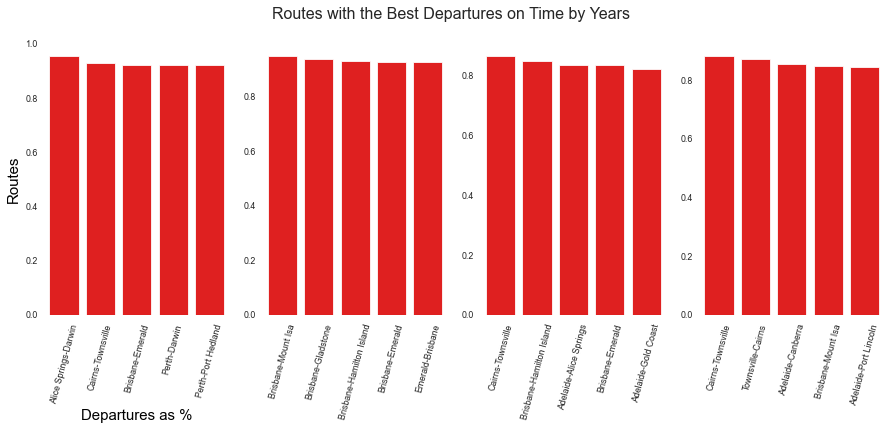

In [31]:
#imprive through definition and better layout

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Routes with the Best Departures on Time by Years', fontsize=16)

bar = sns.barplot(ax=axes[0], x='Route', y="Aggregated Departures", data=bestdep2020, color='red', edgecolor=None)
sns.despine(bottom = True, left = True)
bar.set(xlabel = "Departures as %",ylabel = "Routes")

bar.xaxis.label.set_color('black')
bar.yaxis.label.set_color('black')
bar.set_xticklabels(bar.get_xticklabels(), rotation=75)

bar2 = sns.barplot(ax=axes[1], x='Route', y="Aggregated Departures", data=bestdep2021, color='red', edgecolor=None)
sns.despine(bottom = True, left = True)
bar2.set(xlabel = None,ylabel =None)

bar2.xaxis.label.set_color('black')
bar2.yaxis.label.set_color('black')
bar2.set_xticklabels(bar2.get_xticklabels(), rotation=75)

bar3 = sns.barplot(ax=axes[2], x='Route', y="Aggregated Departures", data=bestdep2022, color='red', edgecolor=None)
sns.despine(bottom = True, left = True)
bar3.set(xlabel = None,ylabel =None)

bar3.xaxis.label.set_color('black')
bar3.yaxis.label.set_color('black')
bar3.set_xticklabels(bar3.get_xticklabels(), rotation=75)

bar4 = sns.barplot(ax=axes[3], x='Route', y="Aggregated Departures", data=bestdep2023, color='red', edgecolor=None)
sns.despine(bottom = True, left = True)
bar4.set(xlabel = None,ylabel =None)

bar4.xaxis.label.set_color('black')
bar4.yaxis.label.set_color('black')
bar4.set_xticklabels(bar4.get_xticklabels(), rotation=75)



In [ ]:
sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Routes with the Best Departures on Time by Years', fontsize=16)

bar = sns.barplot(ax=axes[0], x='Route', y="Aggregated Departures", data=bestdep2020, color='red', edgecolor=None)
sns.despine(bottom = True, left = True)
bar.set(xlabel = "Departures as %",ylabel = "Routes")

bar.xaxis.label.set_color('black')
bar.yaxis.label.set_color('black')
bar.set_xticklabels(bar.get_xticklabels(), rotation=75)

##### Scatterplot for Cancellations

[Text(0.5, 0, 'Cancellations'), Text(0, 0.5, 'Cancellations as %')]

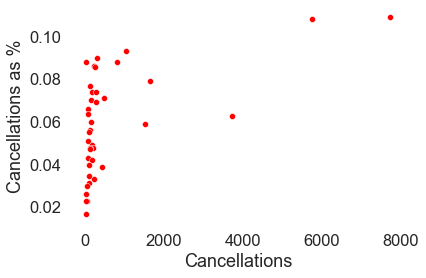

In [32]:
#use airlines

sns.set_style("white")
cns = sns.scatterplot(y='Aggregated Cancellations Depart',x='Cancellations',color="red", data=alldep2020per)
sns.despine(bottom = True, left = True)
cns.set(xlabel = "Cancellations", ylabel = "Cancellations as %")

#### Map Visulisations

In [33]:
df2020_geo = all_yearswithcoors_all[all_yearswithcoors_all["Year"] == "2020"].reset_index(drop=True)

In [34]:
aggregate_list = {}

for column in list(df2020_geo.columns):
    if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
        aggr_method = 'first'
    elif is_numeric_dtype(df2020_geo[column]):
        aggr_method = 'sum'
    else:
        aggr_method = 'first'
    aggregate_list.update({column:aggr_method})

df2020_geo = df2020_geo.groupby('Departing Port').aggregate(aggregate_list)

In [132]:
cn_dep = px.density_mapbox(df2020_geo, lat='latitude_dep', lon='longitude_dep', z='Cancellations', radius=25,
                        center=dict(lat=-25, lon=130), zoom=2.5,
                        mapbox_style="open-street-map")
cn_dep.show()